In [1]:
import operator
from fancyimpute import KNN 
from sklearn.preprocessing import LabelBinarizer
import math
from operator import itemgetter 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection  # Updated import
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression


# Your code continues here
# ...

%matplotlib inline

plt.style.use('bmh')

In [2]:
columns = [
    # nominal
    'gender', #0-1
    'symptoms', #0-1
    'alcohol', #0-1
    'hepatitis b surface antigen', #0-1
    'hepatitis b e antigen', #0-1
    'hepatitis b core antibody', #0-1
    'hepatitis c virus antibody', #0-1
    'cirrhosis', #0-1
    'endemic countries', #0-1
    'smoking', #0-1
    'diabetes', #0-1
    'obesity', #0-1
    'hemochromatosis', #0-1
    'arterial hypertension', #0-1
    'chronic renal insufficiency', #0-1
    'human immunodeficiency virus', #0-1
    'nonalcoholic steatohepatitis', #0-1
    'esophageal varices', #0-1
    'splenomegaly', #0-1
    'portal hypertension', #0-1
    'portal vein thrombosis', #0-1
    'liver metastasis', #0-1
    'radiological hallmark', #0-1
    
    # integer
    'age', # age at diagnosis
    
    # continuous
    'grams of alcohol per day',
    'packs of cigarets per year',
    
    # ordinal
    'performance status',
    'encephalopathy degree',
    'ascites degree',
     
    # continuous   
    'international normalised ratio',
    'alpha-fetoprotein',
    'haemoglobin',
    'mean corpuscular volume',
    'leukocytes',
    'platelets',
    'albumin',
    'total bilirubin',
    'alanine transaminase',
    'aspartate transaminase',
    'gamma glutamyl transferase',
    'alkaline phosphatase',
    'total proteins',
    'creatinine',
    
    # integer
    'number of nodules',
    
    # continuous
    'major dimension of nodule cm',
    'direct bilirubin mg/dL',
    'iron',
    'oxygen saturation %',
    'ferritin',
        
    #nominal
    'class attribute', #0-1
]

columns = list([x.replace(' ', '_').strip() for x in columns])

In [3]:
df = pd.read_csv("E:\hcc-data.csv", 
    names=columns, 
    header=None, 
    na_values=['?']
)
df

gender  symptoms  alcohol  hepatitis_b_surface_antigen  \
0         1       0.0        1                          0.0   
1         0       NaN        0                          0.0   
2         1       0.0        1                          1.0   
3         1       1.0        1                          0.0   
4         1       1.0        1                          1.0   
..      ...       ...      ...                          ...   
160       0       0.0        1                          NaN   
161       0       1.0        0                          NaN   
162       1       0.0        1                          0.0   
163       1       0.0        1                          1.0   
164       1       1.0        1                          0.0   

     hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        1.0   
3                      0.0                        0.0   
4                      0.0                        1.0   
..                     ...                        ...   
160                    NaN                        NaN   
161                    NaN                        NaN   
162                    0.0                        0.0   
163                    0.0                        1.0   
164                    0.0                        0.0   

     hepatitis_c_virus_antibody  cirrhosis  endemic_countries  smoking  ...  \
0                           0.0          1                0.0      1.0  ...   
1                           1.0          1                NaN      NaN  ...   
2                           0.0          1                0.0      1.0  ...   
3                           0.0          1                0.0      1.0  ...   
4                           0.0          1                0.0      1.0  ...   
..                          ...        ...                ...      ...  ...   
160                         1.0          1                0.0      1.0  ...   
161                         NaN          1                0.0      0.0  ...   
162                         0.0          1                0.0      1.0  ...   
163                         1.0          1                1.0      1.0  ...   
164                         1.0          1                0.0      1.0  ...   

     alkaline_phosphatase  total_proteins  creatinine  number_of_nodules  \
0                   150.0             7.1        0.70                1.0   
1                     NaN             NaN         NaN                1.0   
2                   109.0             7.0        2.10                5.0   
3                   174.0             8.1        1.11                2.0   
4                   109.0             6.9        1.80                1.0   
..                    ...             ...         ...                ...   
160                 109.0             7.6        0.70                5.0   
161                 280.0             6.7        0.70                1.0   
162                 181.0             7.5        1.46                5.0   
163                 170.0             8.4        0.74                5.0   
164                 462.0             6.6        3.95                5.0   

     major_dimension_of_nodule_cm  direct_bilirubin_mg/dL  iron  \
0                             3.5                     0.5   NaN   
1                             1.8                     NaN   NaN   
2                            13.0                     0.1  28.0   
3                            15.7                     0.2   NaN   
4                             9.0                     NaN  59.0   
..                            ...                     ...   ...   
160                           3.0                     NaN   NaN   
161                           2.2                     2.3   NaN   
162                          18.6                     NaN   NaN   
163                          18

In [4]:
data = df.copy()

EDA


In [5]:
data.head()

gender  symptoms  alcohol  hepatitis_b_surface_antigen  \
0       1       0.0        1                          0.0   
1       0       NaN        0                          0.0   
2       1       0.0        1                          1.0   
3       1       1.0        1                          0.0   
4       1       1.0        1                          1.0   

   hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
0                    0.0                        0.0   
1                    0.0                        0.0   
2                    0.0                        1.0   
3                    0.0                        0.0   
4                    0.0                        1.0   

   hepatitis_c_virus_antibody  cirrhosis  endemic_countries  smoking  ...  \
0                         0.0          1                0.0      1.0  ...   
1                         1.0          1                NaN      NaN  ...   
2                         0.0          1                0.0      1.0  ...   
3                         0.0          1                0.0      1.0  ...   
4                         0.0          1                0.0      1.0  ...   

   alkaline_phosphatase  total_proteins  creatinine  number_of_nodules  \
0                 150.0             7.1        0.70                1.0   
1                   NaN             NaN         NaN                1.0   
2                 109.0             7.0        2.10                5.0   
3                 174.0             8.1        1.11                2.0   
4                 109.0             6.9        1.80                1.0   

   major_dimension_of_nodule_cm  direct_bilirubin_mg/dL  iron  \
0                           3.5                     0.5   NaN   
1                           1.8                     NaN   NaN   
2                          13.0                     0.1  28.0   
3                          15.7                     0.2   NaN   
4                           9.0                     NaN  59.0   

   oxygen_saturation_%  ferritin  class_attribute  
0                  NaN       NaN                1  
1                  NaN       NaN                1  
2                  6.0      16.0                1  
3                  NaN       NaN                0  
4                 15.0      22.0                1  

[5 rows x 50 columns]

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          165 non-null    int64  
 1   symptoms                        147 non-null    float64
 2   alcohol                         165 non-null    int64  
 3   hepatitis_b_surface_antigen     148 non-null    float64
 4   hepatitis_b_e_antigen           126 non-null    float64
 5   hepatitis_b_core_antibody       141 non-null    float64
 6   hepatitis_c_virus_antibody      156 non-null    float64
 7   cirrhosis                       165 non-null    int64  
 8   endemic_countries               126 non-null    float64
 9   smoking                         124 non-null    float64
 10  diabetes                        162 non-null    float64
 11  obesity                         155 non-null    float64
 12  hemochromatosis                 142 

In [7]:
data.isnull().sum(axis=0)

gender                             0
symptoms                          18
alcohol                            0
hepatitis_b_surface_antigen       17
hepatitis_b_e_antigen             39
hepatitis_b_core_antibody         24
hepatitis_c_virus_antibody         9
cirrhosis                          0
endemic_countries                 39
smoking                           41
diabetes                           3
obesity                           10
hemochromatosis                   23
arterial_hypertension              3
chronic_renal_insufficiency        2
human_immunodeficiency_virus      14
nonalcoholic_steatohepatitis      22
esophageal_varices                52
splenomegaly                      15
portal_hypertension               11
portal_vein_thrombosis             3
liver_metastasis                   4
radiological_hallmark              2
age                                0
grams_of_alcohol_per_day          48
packs_of_cigarets_per_year        53
performance_status                 0
e

In [8]:
data.describe()

gender    symptoms     alcohol  hepatitis_b_surface_antigen  \
count  165.000000  147.000000  165.000000                   148.000000   
mean     0.806061    0.639456    0.739394                     0.108108   
std      0.396586    0.481800    0.440302                     0.311571   
min      0.000000    0.000000    0.000000                     0.000000   
25%      1.000000    0.000000    0.000000                     0.000000   
50%      1.000000    1.000000    1.000000                     0.000000   
75%      1.000000    1.000000    1.000000                     0.000000   
max      1.000000    1.000000    1.000000                     1.000000   

       hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
count             126.000000                 141.000000   
mean                0.007937                   0.269504   
std                 0.089087                   0.445284   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 0.000000                   1.000000   
max                 1.000000                   1.000000   

       hepatitis_c_virus_antibody   cirrhosis  endemic_countries     smoking  \
count                  156.000000  165.000000         126.000000  124.000000   
mean                     0.217949    0.903030           0.079365    0.508065   
std                      0.414182    0.296817           0.271387    0.501963   
min                      0.000000    0.000000           0.000000    0.000000   
25%                      0.000000    1.000000           0.000000    0.000000   
50%                      0.000000    1.000000           0.000000    1.000000   
75%                      0.000000    1.000000           0.000000    1.000000   
max                      1.000000    1.000000           1.000000    1.000000   

       ...  alkaline_phosphatase  total_proteins  creatinine  \
count  ...            162.000000      154.000000  158.000000   
mean   ...            212.211605        8.961039    1.127089   
std    ...            167.943548       11.728739    0.955856   
min    ...              1.280000        3.900000    0.200000   
25%    ...            108.250000        6.300000    0.700000   
50%    ...            162.000000        7.050000    0.850000   
75%    ...            261.500000        7.575000    1.100000   
max    ...            980.000000      102.000000    7.600000   

       number_of_nodules  major_dimension_of_nodule_cm  \
count         163.000000                    145.000000   
mean            2.736196                      6.851172   
std             1.797901                      5.095042   
min             0.000000                      1.500000   
25%             1.000000                      3.000000   
50%             2.000000                      5.000000   
75%             5.000000                      9.000000   
max             5.000000                     22.000000   

       direct_bilirubin_mg/dL        iron  oxygen_saturation_%     ferritin  \
count              121.000000   86.000000            85.000000    85.000000   
mean                 1.930000   85.598837            37.028941   438.997647   
std                  4.210452   55.698995            28.993552   457.114454   
min                  0.100000    0.000000             0.000000     0.000000   
25%                  0.370000   40.500000            16.000000    84.000000   
50%                  0.700000   83.000000            27.000000   295.000000   
75%                  1.400000  118.000000            56.000000   706.000000   
max                 29.300000  224.000000           126.000000  2230.000000   

       class_attribute  
count       165.000000  
mean          0.618182  
std           0.487311  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           1.000000  
max           1.000000  

[8 rows x 50 columns]

What do we know about patients ?

In [9]:
data['age'].isnull().sum()

0

In [10]:
print('The oldest patient: {} years.'.format(data['age'].max()))
print('The youngest patient: {} years.'.format(data['age'].min()))
print('Average age: {} years.'.format(data['age'].mean()))
print('Median age: {} years.'.format(data['age'].median(skipna=True)))

The oldest patient: 93 years.
The youngest patient: 20 years.
Average age: 64.69090909090909 years.
Median age: 66.0 years.


C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_25636\1056544157.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_25636\1056544157.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


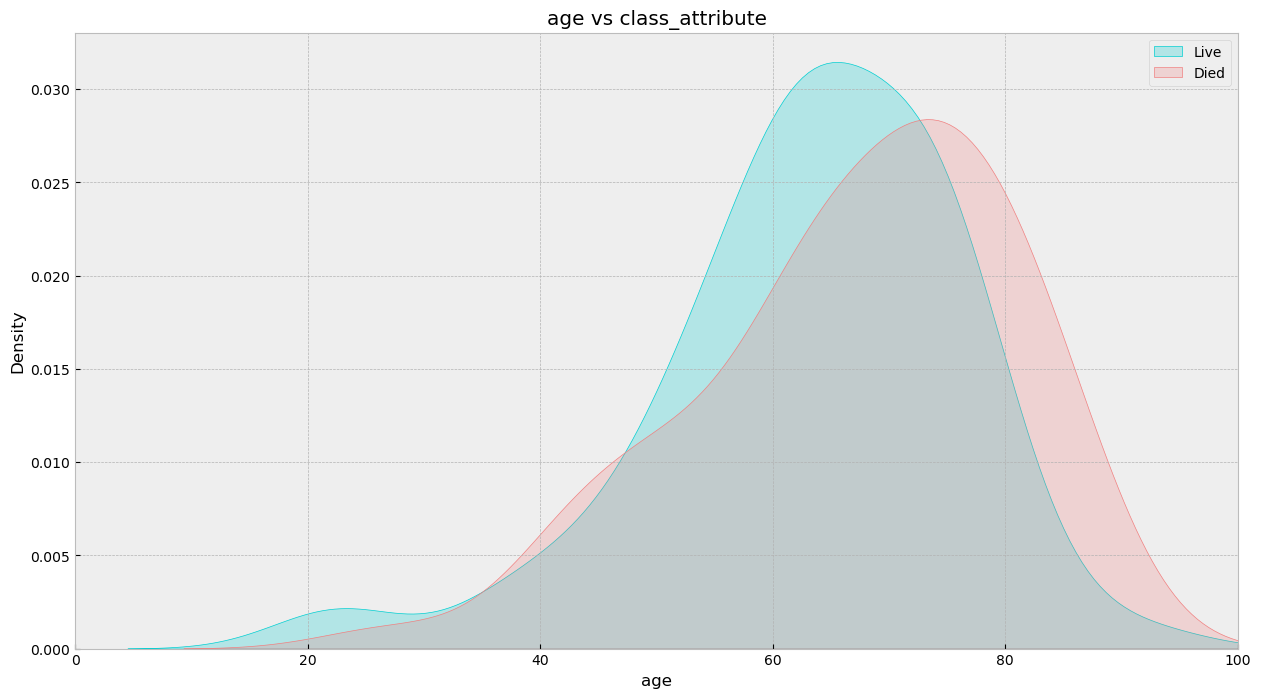

In [11]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.age[data.class_attribute == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data.age[data.class_attribute == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('age vs class_attribute')
plt.xlim(0,100)
plt.show()

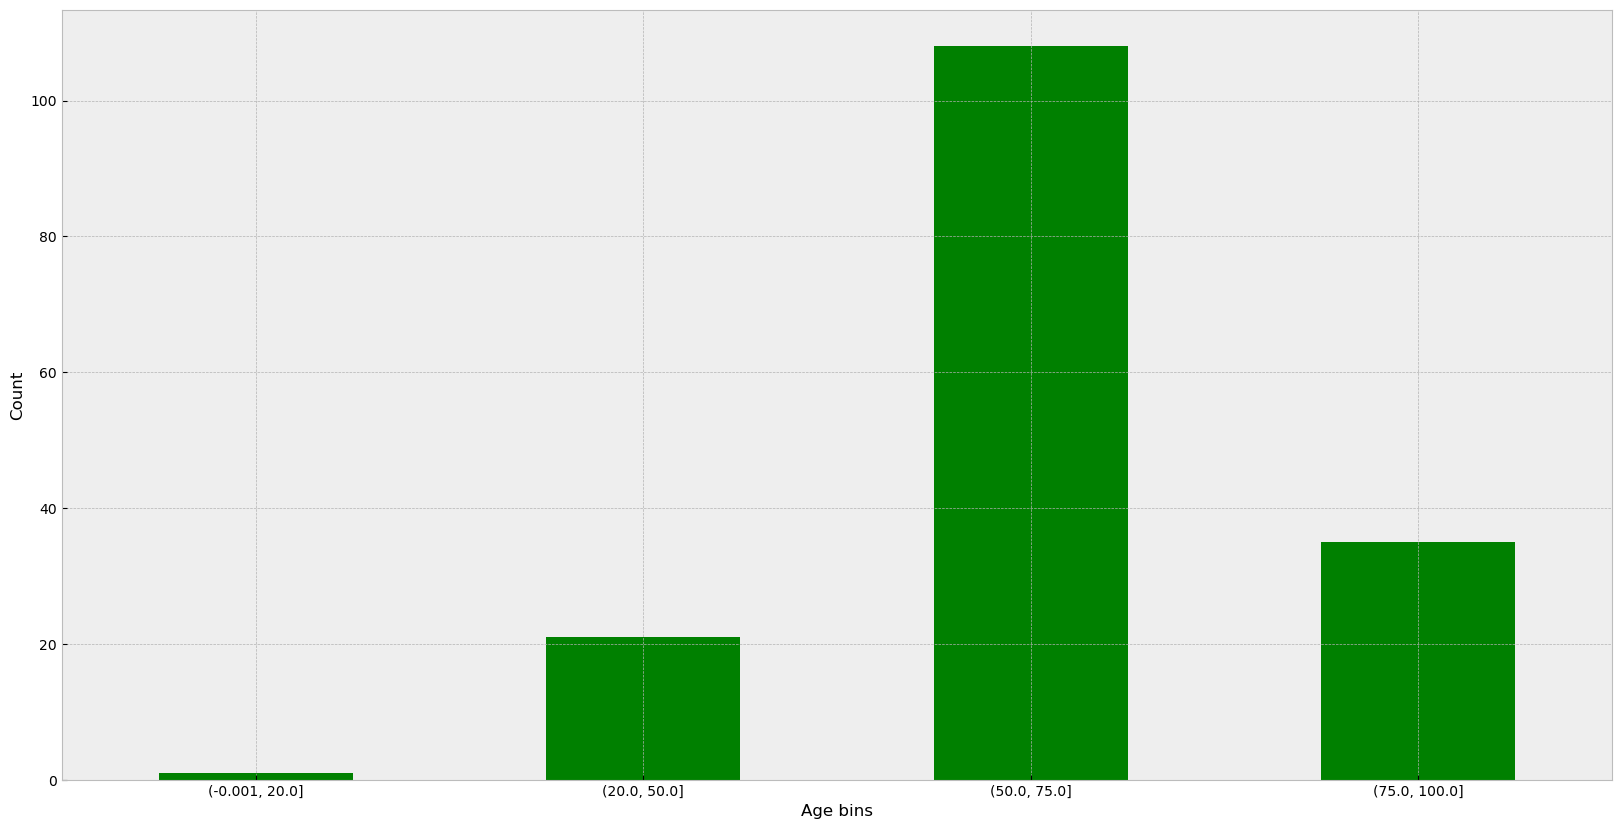

In [12]:
bins = [0, 20, 50, 75, 100]

out = pd.cut(
    data.age, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color="g", 
    figsize=(20,10)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

The age distribution for survivors and deceased is quite similar. After binning and plots analysis we can see that the largest proportion of survivors/died patients were in age range of 50-75.

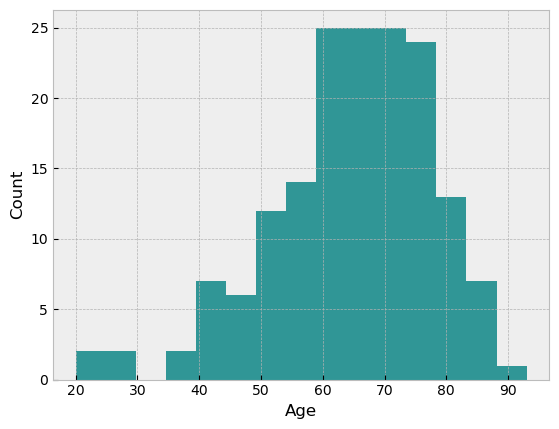

In [13]:
ax = data.age.hist(
    bins=15,
    color='teal', 
    alpha=0.8
)

ax.set(
    xlabel='Age', 
    ylabel='Count'
)

plt.show()

GRAMS_OF_ALCOHOL_PER_DAY VS CLASS_ATTRIBUTE (SURVIVAL)

In [20]:
data['grams_of_alcohol_per_day'].isnull().sum()


48

In [21]:
max(data["grams_of_alcohol_per_day"])

500.0

In [22]:
min(data["grams_of_alcohol_per_day"])

0.0

In [23]:
data["grams_of_alcohol_per_day"].mean()

71.00854700854701

In [24]:
data["grams_of_alcohol_per_day"].median()

75.0

C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_15508\1771479443.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_15508\1771479443.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


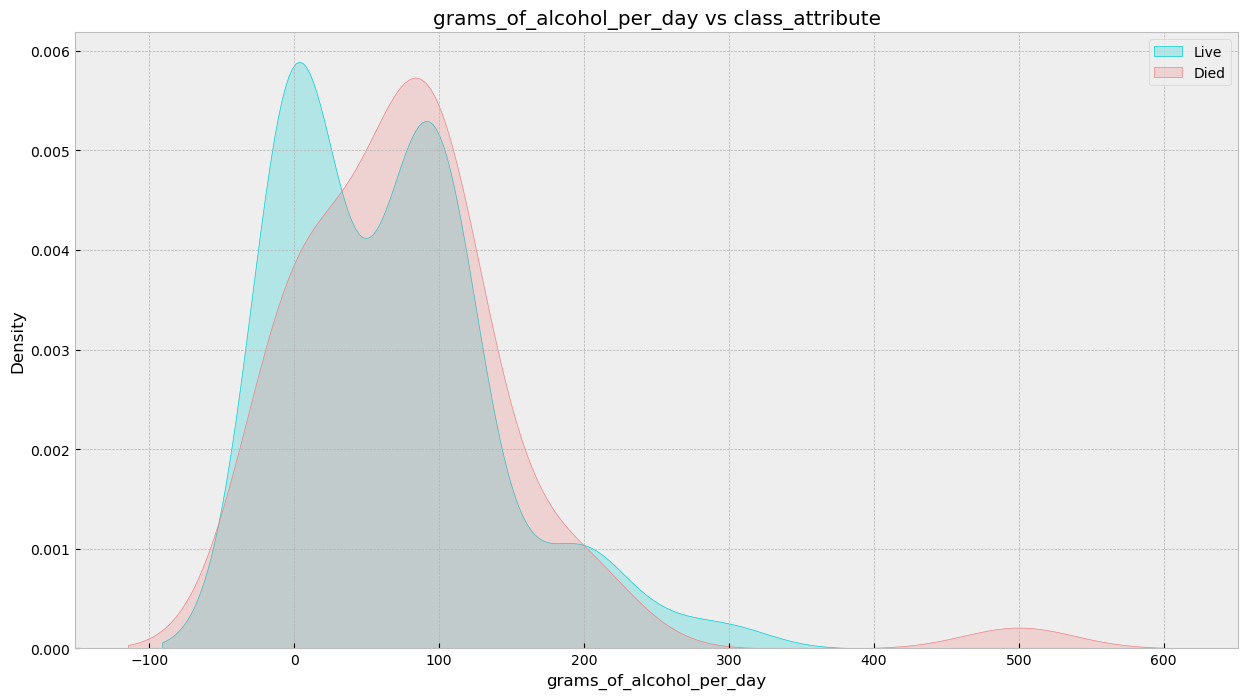

In [25]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.grams_of_alcohol_per_day[data.class_attribute == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data.grams_of_alcohol_per_day[data.class_attribute == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('grams_of_alcohol_per_day vs class_attribute')
plt.show()

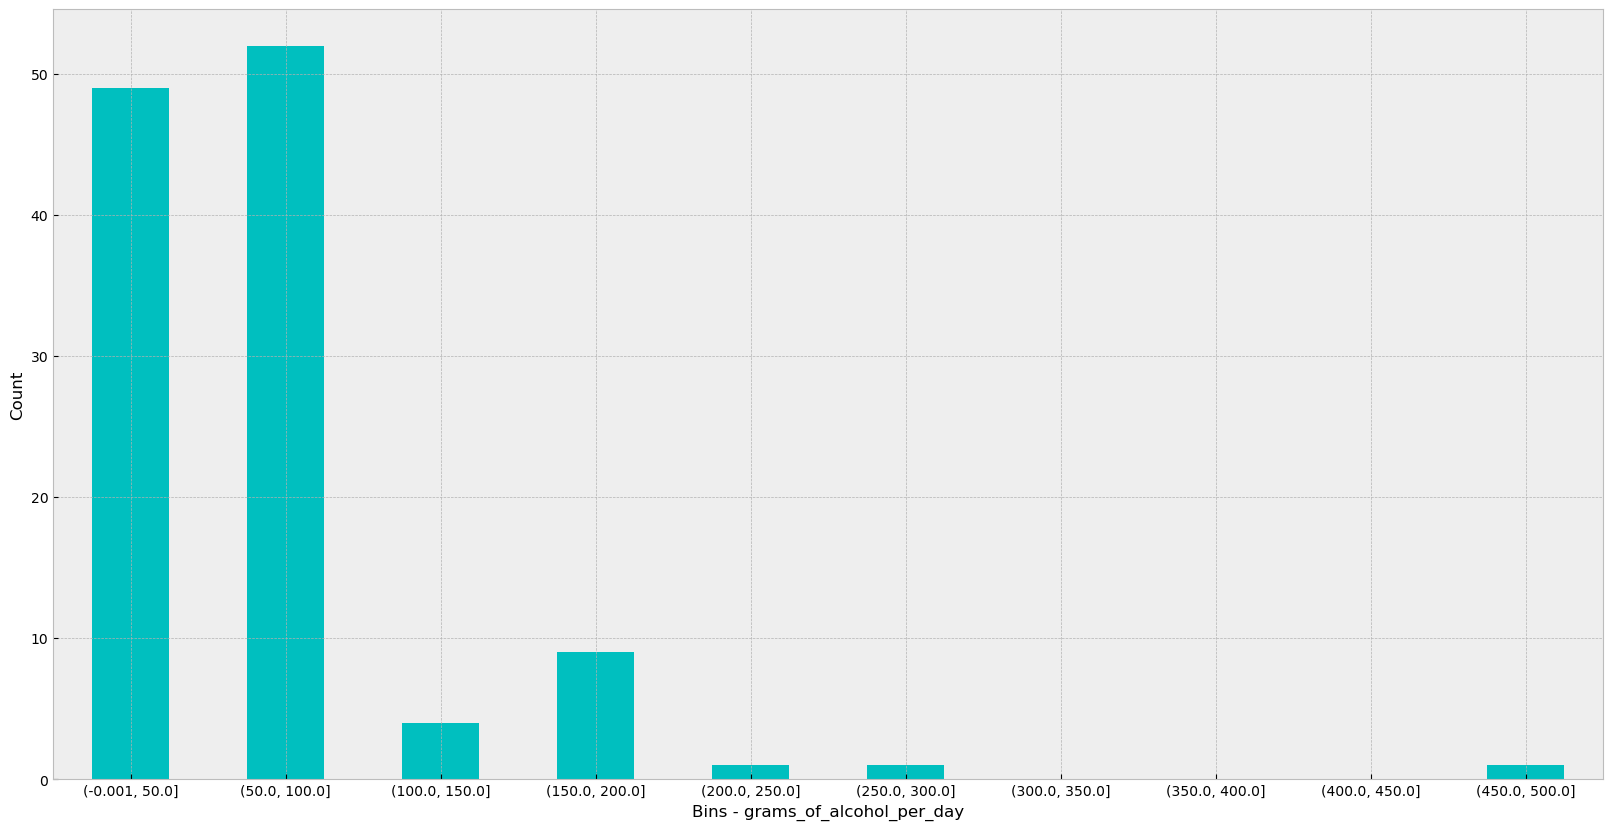

In [26]:
bins = [
    0, 50, 100, 
    150, 200, 250, 
    300, 350, 400,
    450, 500
]

out = pd.cut(
    data.grams_of_alcohol_per_day, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color='c', 
    figsize=(20,10)
)

plt.xlabel('Bins - grams_of_alcohol_per_day')
plt.ylabel('Count')
plt.show()

PACKS_OF_CIGARETS_PER_YEAR VS CLASS_ATTRIBUTE (SURVIVAL)

In [27]:
data['packs_of_cigarets_per_year'].isnull().sum()

53

In [28]:
max(data['packs_of_cigarets_per_year'])

510.0

In [29]:
min(data['packs_of_cigarets_per_year'])

0.0

In [30]:
data['packs_of_cigarets_per_year'].mean()

20.464285714285715

C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_15508\4126235998.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_15508\4126235998.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


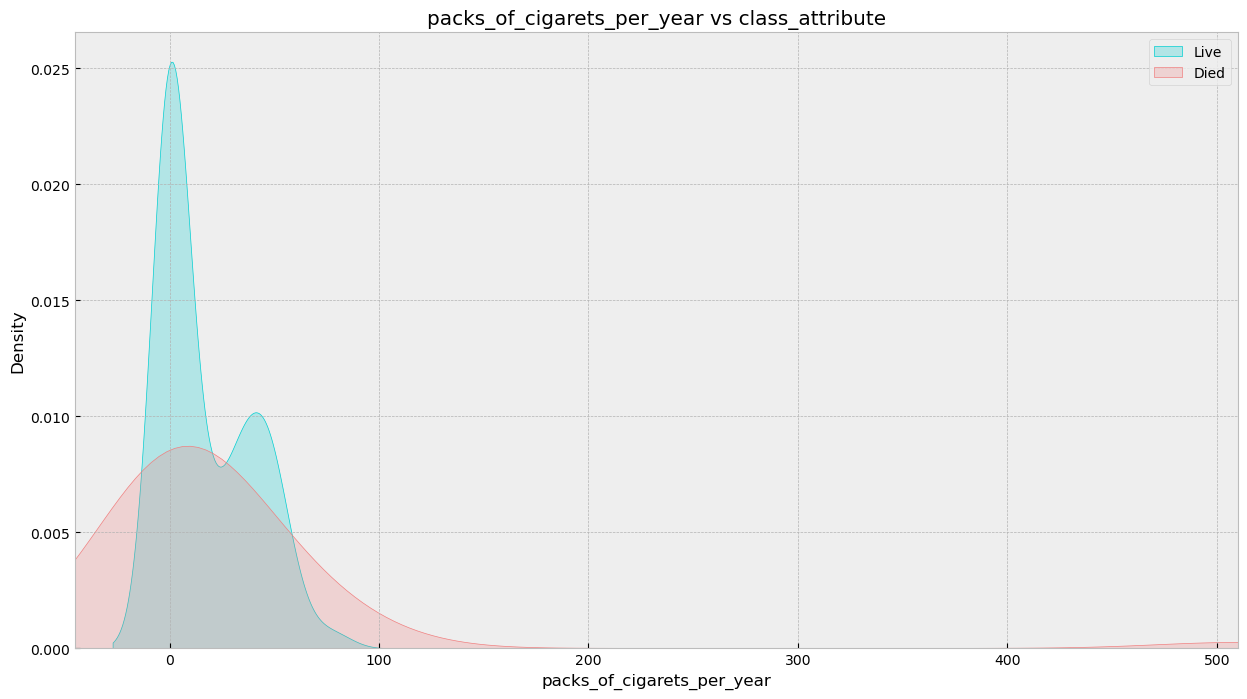

In [31]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data["packs_of_cigarets_per_year"][data.class_attribute == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data["packs_of_cigarets_per_year"][data.class_attribute == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('packs_of_cigarets_per_year vs class_attribute')
plt.xlim(-45, 510)
plt.show()

What do we know about the survival ?

In [32]:
data['class_attribute'].value_counts()

class_attribute
1    102
0     63
Name: count, dtype: int64

We can see that men are more susceptible to die.

In [50]:
data['class_attribute'].isnull().sum()

0

In [51]:
data['gender'].isnull().sum()

0

In [52]:
data.groupby(['gender','class_attribute'])['class_attribute'].count()


gender  class_attribute
0       0                  11
        1                  21
1       0                  52
        1                  81
Name: class_attribute, dtype: int64

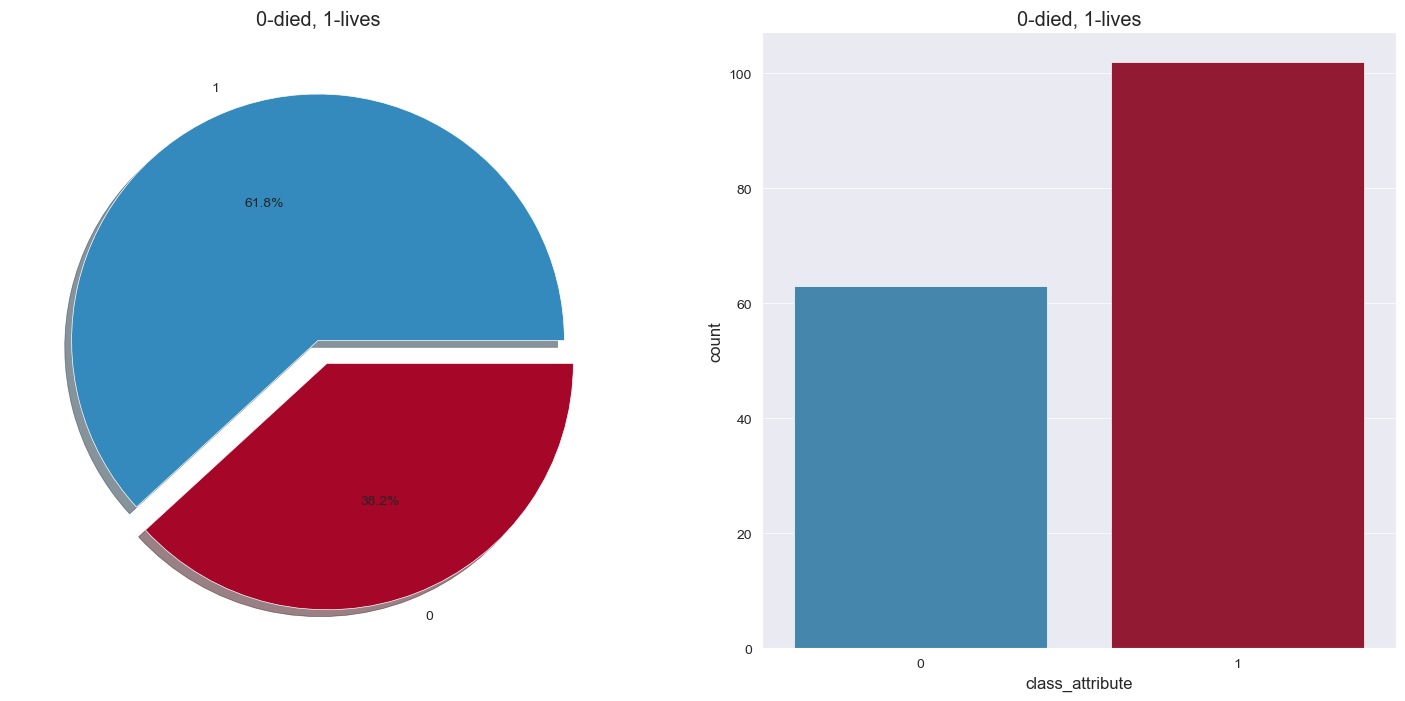

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['class_attribute'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('0-died, 1-lives')
ax[0].set_ylabel('')

sns.countplot(x='class_attribute', data=data, ax=ax[1])  # Explicitly provide 'x' and 'data' arguments
ax[1].set_title('0-died, 1-lives')

plt.show()

cirrhosis VS CLASS_ATTRIBUTE (SURVIVAL)

In [15]:
data['cirrhosis'].isnull().sum()

0

In [16]:
max(data["cirrhosis"])

1

In [17]:
min(data['cirrhosis'])

0

In [18]:
data["cirrhosis"].mean()

0.9030303030303031

C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_25636\146663109.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\SOUMI SUR\AppData\Local\Temp\ipykernel_25636\146663109.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


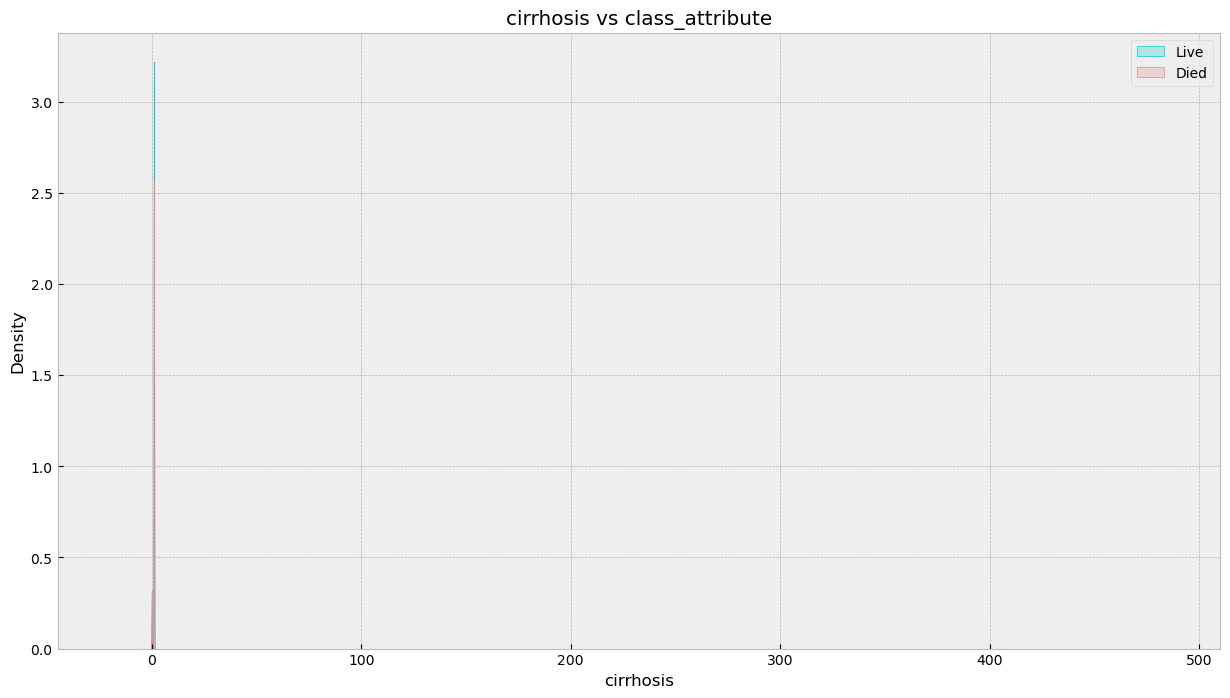

In [19]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data["cirrhosis"][data.class_attribute == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data["cirrhosis"][data.class_attribute == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('cirrhosis vs class_attribute')
plt.xlim(-45, 510)
plt.show()

MISSING VALUES

In [54]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

missing_data.head(15)

Total   Percent
oxygen_saturation_%              80  0.484848
ferritin                         80  0.484848
iron                             79  0.478788
packs_of_cigarets_per_year       53  0.321212
esophageal_varices               52  0.315152
grams_of_alcohol_per_day         48  0.290909
direct_bilirubin_mg/dL           44  0.266667
smoking                          41  0.248485
endemic_countries                39  0.236364
hepatitis_b_e_antigen            39  0.236364
hepatitis_b_core_antibody        24  0.145455
hemochromatosis                  23  0.139394
nonalcoholic_steatohepatitis     22  0.133333
major_dimension_of_nodule_cm     20  0.121212
symptoms                         18  0.109091

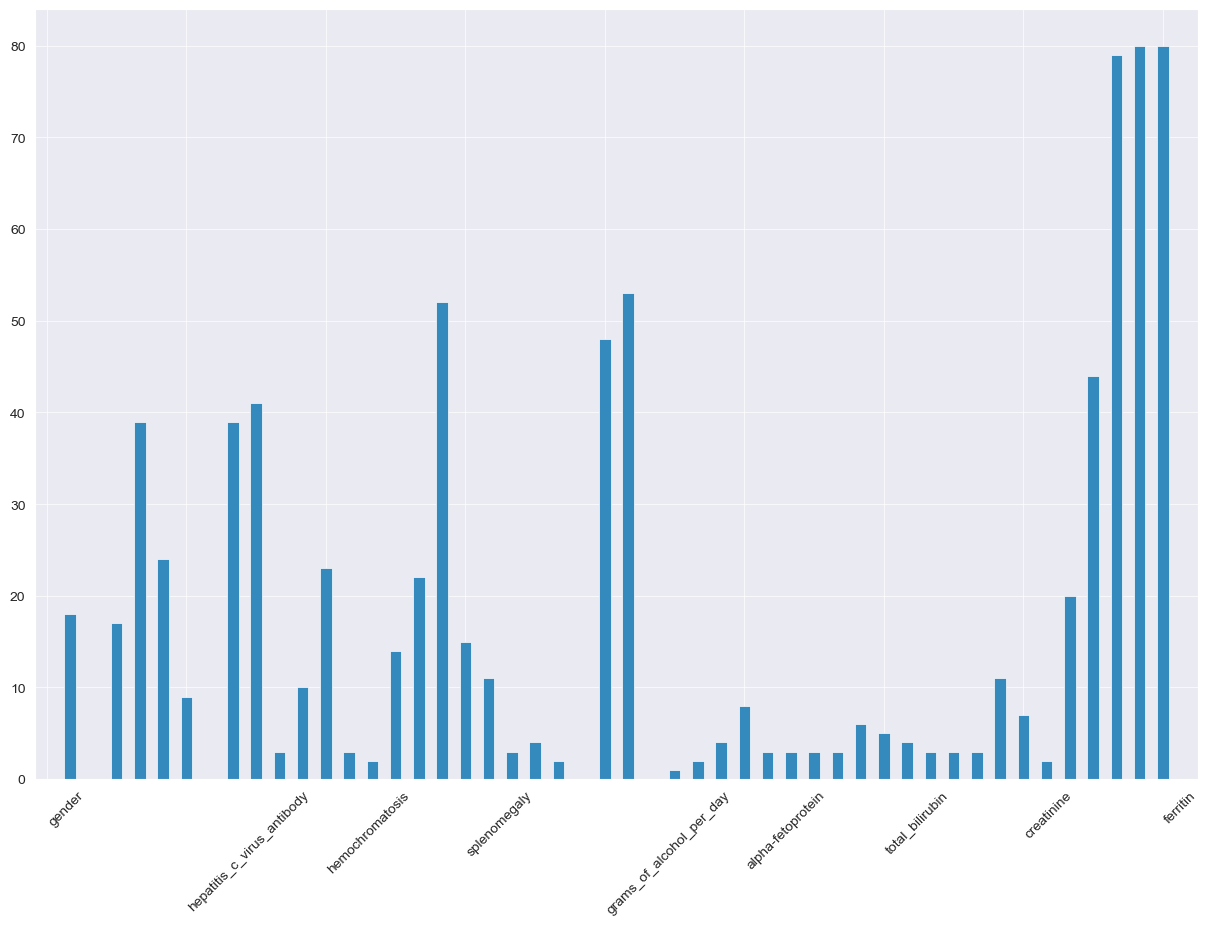

In [55]:
cons = data.loc[:, :]

cons['null_values'] = cons.isnull().sum(axis=1)

null_values = cons.drop('null_values', axis=1).isnull().sum()

sns.set_style("darkgrid")

plt.figure(figsize=(15,10))

pbar = null_values.plot.bar()

plt.xticks(
    list(range(0,len(null_values.index),6)), 
    list(null_values.index[0::6]), 
    rotation=45, 
    ha='left'
)

plt.show()

In [43]:
data.groupby('class_attribute').count()

gender  symptoms  alcohol  hepatitis_b_surface_antigen  \
class_attribute                                                           
0                    63        62       63                           53   
1                   102        85      102                           95   

                 hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
class_attribute                                                     
0                                   46                         50   
1                                   80                         91   

                 hepatitis_c_virus_antibody  cirrhosis  endemic_countries  \
class_attribute                                                             
0                                        57         63                 48   
1                                        99        102                 78   

                 smoking  ...  gamma_glutamyl_transferase  \
class_attribute           ...                               
0                     46  ...                          63   
1                     78  ...                          99   

                 alkaline_phosphatase  total_proteins  creatinine  \
class_attribute                                                     
0                                  63              61          61   
1                                  99              93          97   

                 number_of_nodules  major_dimension_of_nodule_cm  \
class_attribute                                                    
0                               63                            54   
1                              100                            91   

                 direct_bilirubin_mg/dL  iron  oxygen_saturation_%  ferritin  
class_attribute                                                               
0                                    48    39                   39        40  
1                                    73    47                   46        45  

[2 rows x 49 columns]

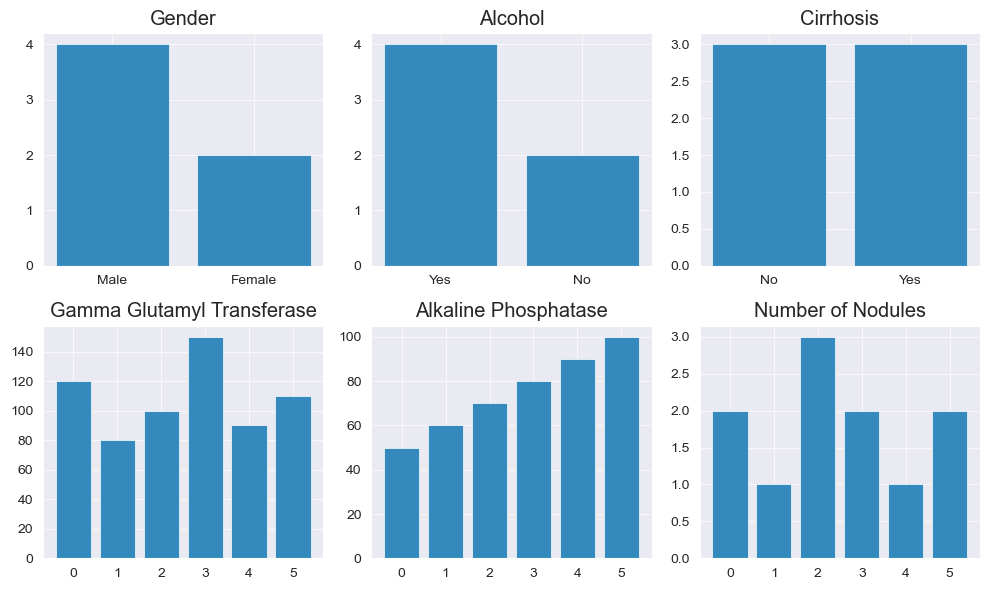

In [44]:
import matplotlib.pyplot as plt

# Sample data
gender = ['Male', 'Female', 'Male', 'Male', 'Female', 'Male']
alcohol = ['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
cirrhosis = ['No', 'Yes', 'Yes', 'No', 'No', 'Yes']
gamma_glutamyl_transferase = [120, 80, 100, 150, 90, 110]
alkaline_phosphatase = [50, 60, 70, 80, 90, 100]
number_of_nodules = [2, 1, 3, 2, 1, 2]

# Count occurrences of each attribute
gender_counts = {x: gender.count(x) for x in gender}
alcohol_counts = {x: alcohol.count(x) for x in alcohol}
cirrhosis_counts = {x: cirrhosis.count(x) for x in cirrhosis}

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Gender
plt.subplot(231)
plt.bar(gender_counts.keys(), gender_counts.values())
plt.title('Gender')

# Alcohol
plt.subplot(232)
plt.bar(alcohol_counts.keys(), alcohol_counts.values())
plt.title('Alcohol')

# Cirrhosis
plt.subplot(233)
plt.bar(cirrhosis_counts.keys(), cirrhosis_counts.values())
plt.title('Cirrhosis')

# Gamma Glutamyl Transferase
plt.subplot(234)
plt.bar(range(len(gamma_glutamyl_transferase)), gamma_glutamyl_transferase)
plt.xticks(range(len(gamma_glutamyl_transferase)))
plt.title('Gamma Glutamyl Transferase')

# Alkaline Phosphatase
plt.subplot(235)
plt.bar(range(len(alkaline_phosphatase)), alkaline_phosphatase)
plt.xticks(range(len(alkaline_phosphatase)))
plt.title('Alkaline Phosphatase')

# Number of Nodules
plt.subplot(236)
plt.bar(range(len(number_of_nodules)), number_of_nodules)
plt.xticks(range(len(number_of_nodules)))
plt.title('Number of Nodules')

# Adjust spacing between subplots
plt.tight_layout()

# Show the graph
plt.show()


In [60]:
# Initialize an empty dataframe to store the results
percentage_table = pd.DataFrame()

# Loop through each column in the data
for column in data.columns:
    # Calculate the percentage of 'dead' and 'alive' in the column
    counts = data[column].value_counts(normalize=True) * 100
    # Add the results to the percentage_table
    percentage_table[column] = counts

percentage_table


gender   symptoms    alcohol  hepatitis_b_surface_antigen  \
gender                                                                 
1       80.606061  63.945578  73.939394                    10.810811   
0       19.393939  36.054422  26.060606                    89.189189   

        hepatitis_b_e_antigen  hepatitis_b_core_antibody  \
gender                                                     
1                    0.793651                  26.950355   
0                   99.206349                  73.049645   

        hepatitis_c_virus_antibody  cirrhosis  endemic_countries    smoking  \
gender                                                                        
1                        21.794872   90.30303           7.936508  50.806452   
0                        78.205128    9.69697          92.063492  49.193548   

        ...  alkaline_phosphatase  total_proteins  creatinine  \
gender  ...                                                     
1       ...                   NaN             NaN    1.898734   
0       ...                   NaN             NaN         NaN   

        number_of_nodules  major_dimension_of_nodule_cm  \
gender                                                    
1               41.104294                           NaN   
0                0.613497                           NaN   

        direct_bilirubin_mg/dL      iron  oxygen_saturation_%  ferritin  \
gender                                                                    
1                     5.785124       NaN                  NaN       NaN   
0                          NaN  1.162791             1.176471  1.176471   

        class_attribute  
gender                   
1             61.818182  
0             38.181818  

[2 rows x 50 columns]

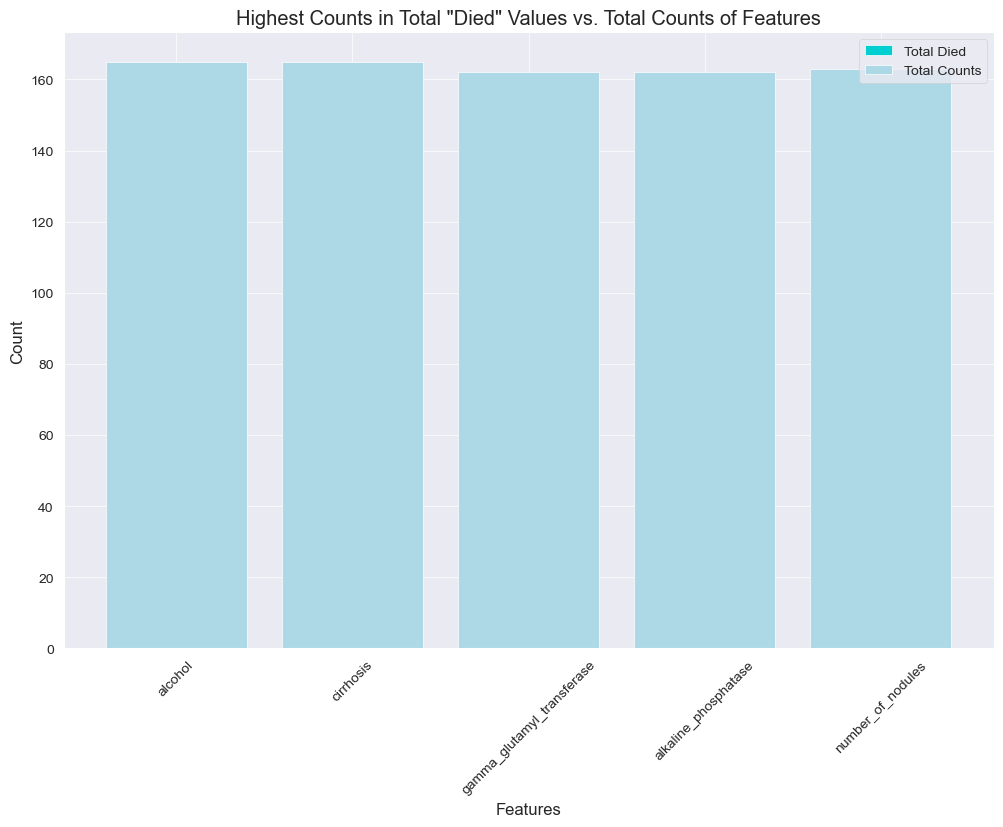

In [100]:
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the relevant data
# Replace 'data' with the actual DataFrame name

# Select the columns of interest
columns_of_interest = ['alcohol', 'cirrhosis', 'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'number_of_nodules']

# Calculate the total count of 'died' values
total_died = (data['class_attribute'] == 'died').sum()

# Calculate the total count for each feature
total_counts = {}
for column in columns_of_interest:
    total_counts[column] = data[column].count()

# Create a bar chart for the highest counts in the total "died" values vs. the total counts of features
plt.figure(figsize=(12, 8))
plt.bar(columns_of_interest, [total_died] * len(columns_of_interest), color='darkturquoise', label='Total Died')
plt.bar(columns_of_interest, total_counts.values(), color='lightblue', label='Total Counts')
plt.title('Highest Counts in Total "Died" Values vs. Total Counts of Features')
plt.xlabel('Features')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


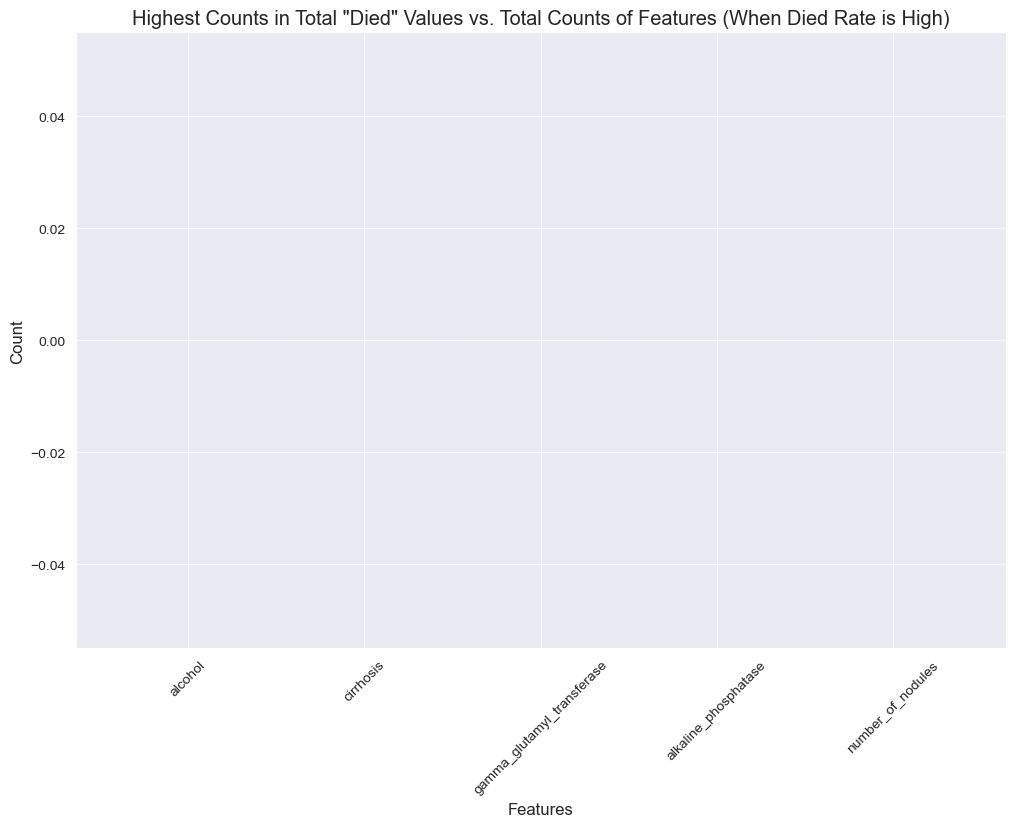

In [105]:
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the relevant data
# Replace 'data' with the actual DataFrame name

# Select the columns of interest
columns_of_interest = ['alcohol', 'cirrhosis', 'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'number_of_nodules']

# Calculate the highest counts in the total "died" values for each feature
highest_counts = {}
for column in columns_of_interest:
    highest_counts[column] = data[data['class_attribute'] == 'died'][column].sum()

# Sort the highest counts in descending order
sorted_counts = sorted(highest_counts.items(), key=lambda x: x[1], reverse=True)
sorted_features, sorted_counts = zip(*sorted_counts)

# Create a bar chart for the highest counts in the total "died" values vs. the features
plt.figure(figsize=(12, 8))
plt.bar(sorted_features, sorted_counts, color='darkturquoise')
plt.title('Highest Counts in Total "Died" Values vs. Total Counts of Features (When Died Rate is High)')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [153]:
# Verify the column names in the DataFrame
print(data.columns)

# Assuming 'null_values' is the column name to be dropped
if 'null_values' in data.columns:
    data2 = data.drop(columns=['null_values'])
    # Proceed with further operations using the modified DataFrame 'data2'
else:
    print("The column 'null_values' does not exist in the DataFrame.")


Index(['gender', 'symptoms', 'alcohol', 'hepatitis_b_surface_antigen',
       'hepatitis_b_e_antigen', 'hepatitis_b_core_antibody',
       'hepatitis_c_virus_antibody', 'cirrhosis', 'endemic_countries',
       'smoking', 'diabetes', 'obesity', 'hemochromatosis',
       'arterial_hypertension', 'chronic_renal_insufficiency',
       'human_immunodeficiency_virus', 'nonalcoholic_steatohepatitis',
       'esophageal_varices', 'splenomegaly', 'portal_hypertension',
       'portal_vein_thrombosis', 'liver_metastasis', 'radiological_hallmark',
       'age', 'grams_of_alcohol_per_day', 'packs_of_cigarets_per_year',
       'performance_status', 'encephalopathy_degree', 'ascites_degree',
       'international_normalised_ratio', 'alpha-fetoprotein', 'haemoglobin',
       'mean_corpuscular_volume', 'leukocytes', 'platelets', 'albumin',
       'total_bilirubin', 'alanine_transaminase', 'aspartate_transaminase',
       'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'total_proteins',
       'c

HEATMAP WITH NaN

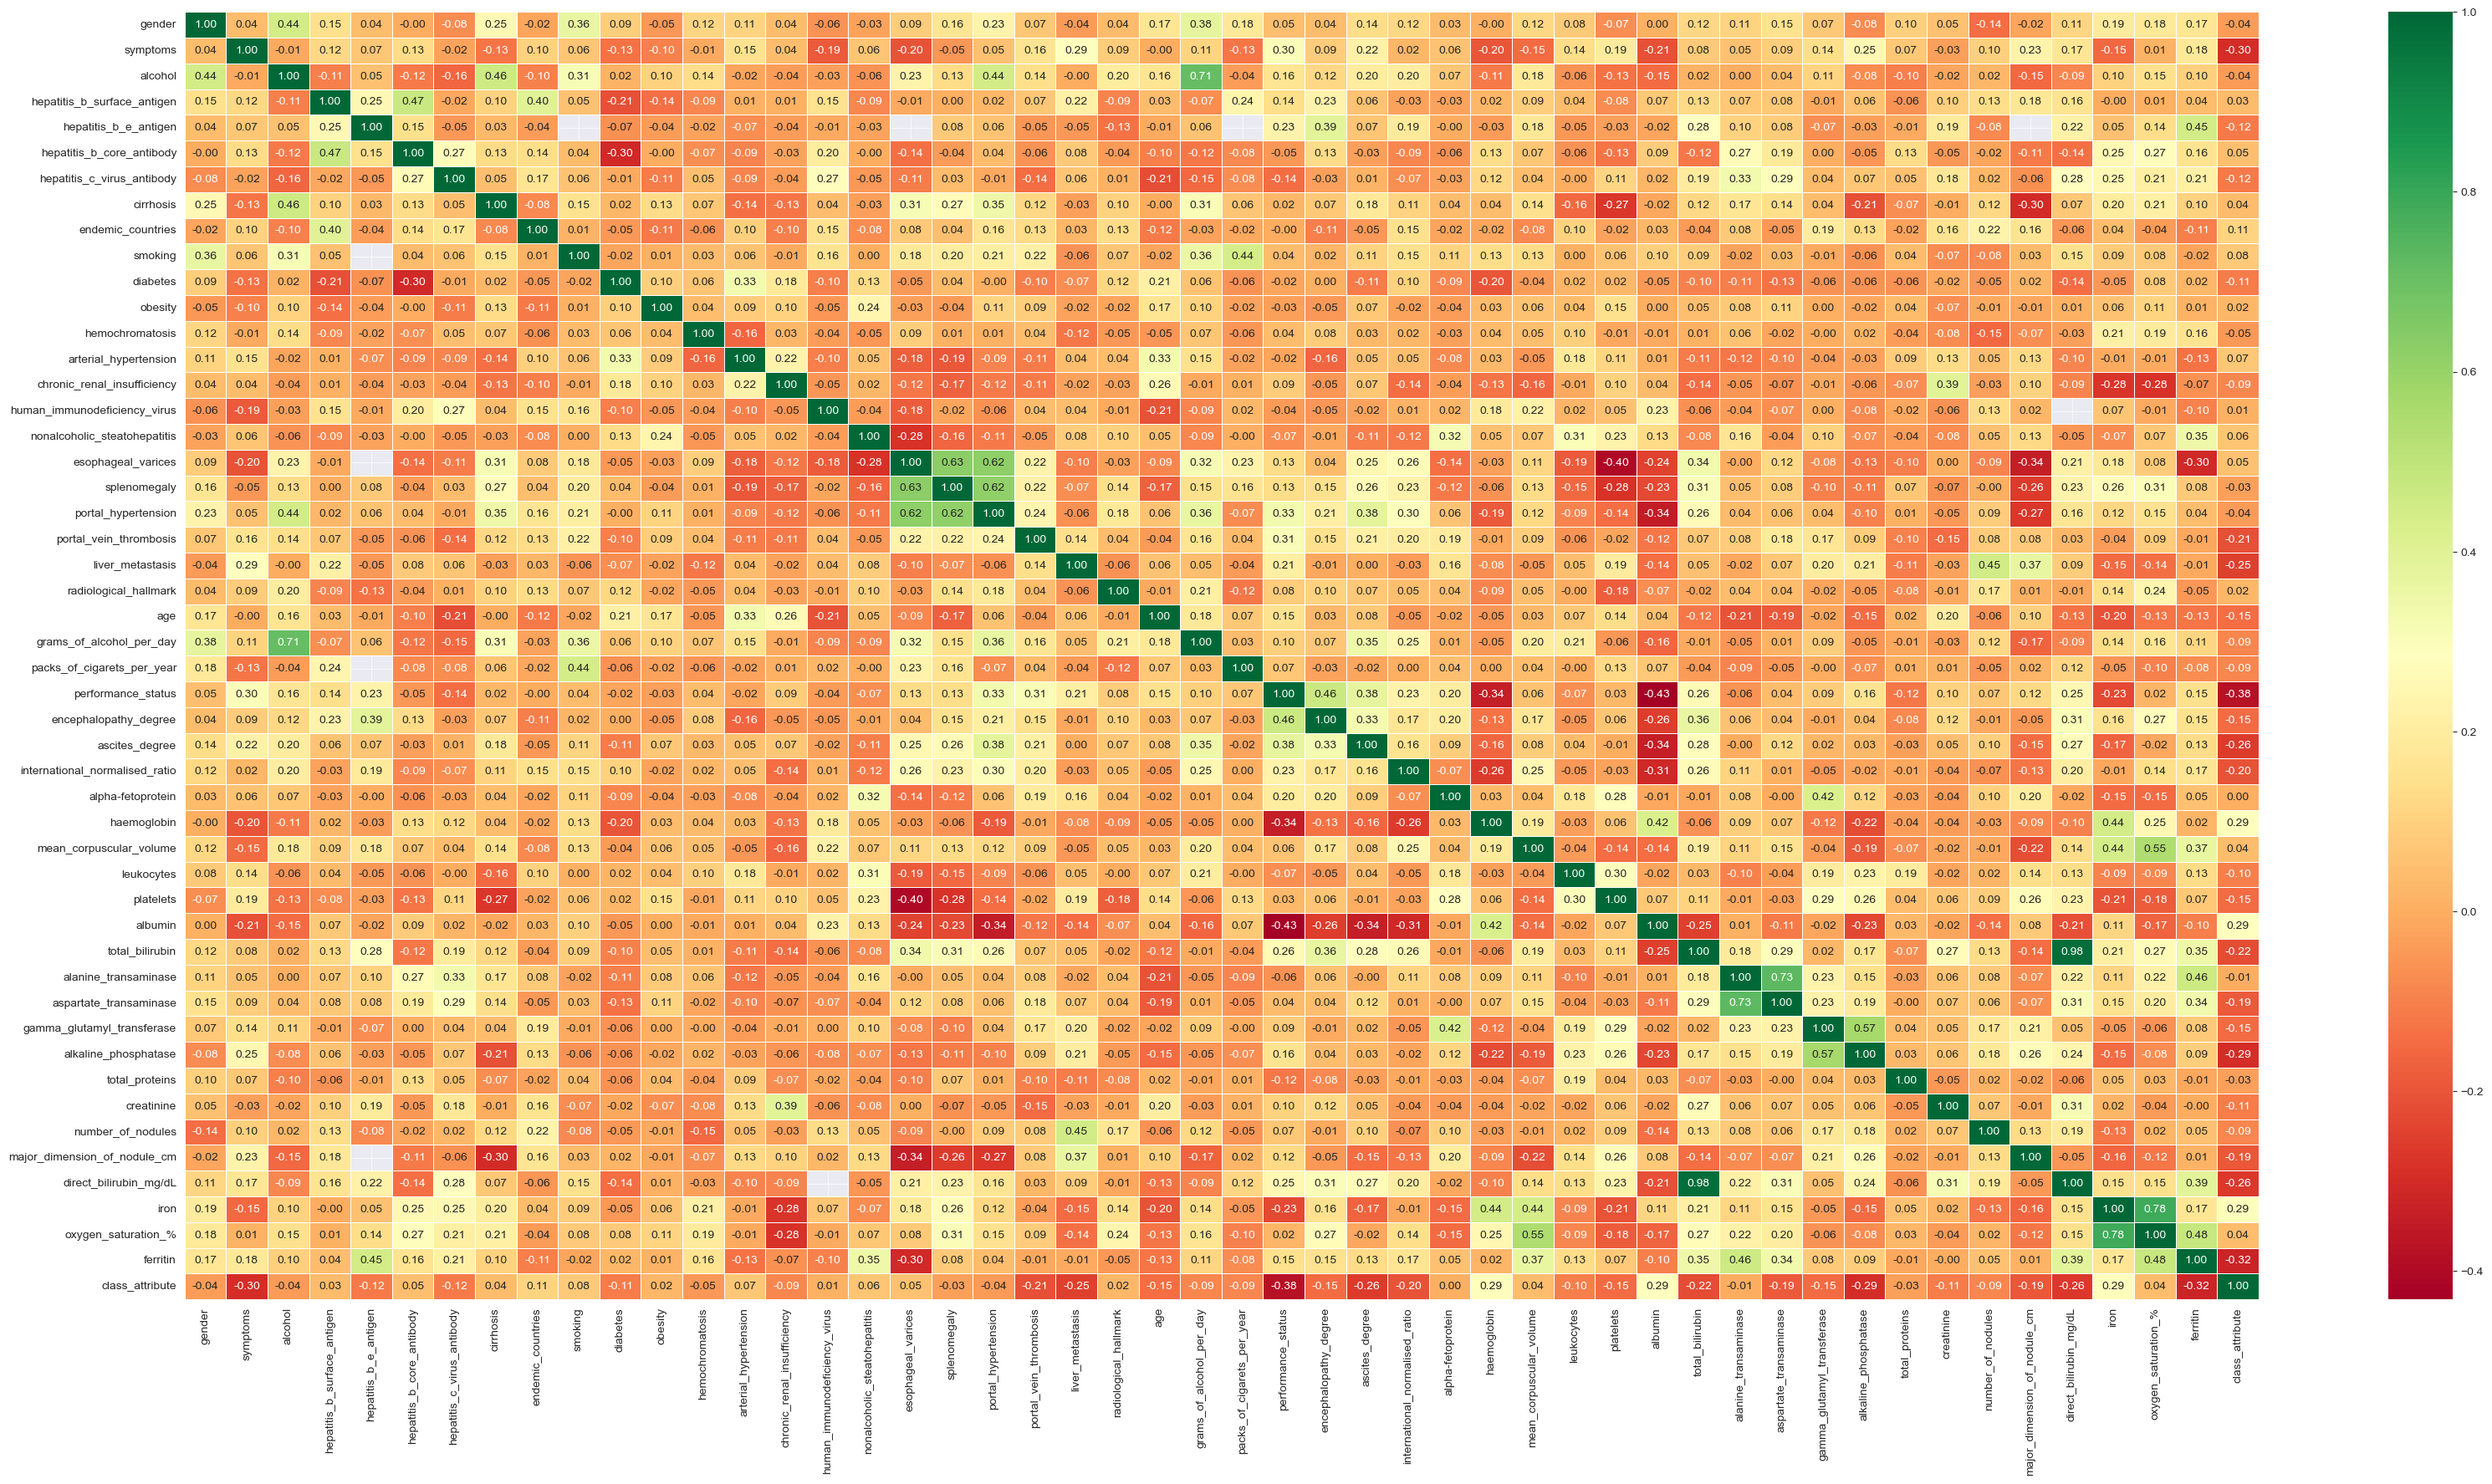

In [156]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

WORKING WITH MISSING VALUES

In [180]:
def prepare_missing_values_for_nans(df=None, columns=None):
    """
    Looking for the most frequent value for both decision classes outputs - 0,1.
    """
    
    to_update_nans_dict = {}
    
    if columns:
        for decision_class in [0, 1]:
            for column in columns:
                vals = df[df.class_attribute == decision_class][column].value_counts()
                
                to_update_nans_dict['{decision_class}_{column}'.format(
                    decision_class=decision_class,
                    column=column
                )] = vals.idxmax()
                
        return to_update_nans_dict


In [181]:
def replace_missing_values(df=None, columns=None, to_update_nans_dict=None):
    """
    Replacing NaN with the most frequent values for both decission classes outputs - 0,1.
    """
    
    df_list = []
    
    if columns:
        for decision_class in [0, 1]:
            _df = df[df.class_attribute == decision_class].reset_index(drop=True)

            for column in columns:        
                _df[column] = _df[column].fillna(
                    to_update_nans_dict['{}_{}'.format(decision_class, column)]
            )

            df_list.append(_df)

        return df_list

NOMINAL VALUES

In [182]:
# replacing NaNs with the most frequent value in column
nominal_indexes = [
    1, 3, 4, 5, 
    6, 8, 9, 10, 
    11, 12, 13, 
    14, 15, 16, 
    17, 18, 19, 
    20, 21, 22
]

nominal_columns_to_discretize = list(itemgetter(*nominal_indexes)(columns))

In [183]:
# prepare missing values
nominal_dict = prepare_missing_values_for_nans(
    df=data, 
    columns=nominal_columns_to_discretize
)

# replace NaN
missing_nominal_values_list = replace_missing_values(
    df=data,
    columns=nominal_columns_to_discretize,
    to_update_nans_dict=nominal_dict

)

# data[nominal_columns_to_discretize] = data[nominal_columns_to_discretize].apply(
#     lambda x:x.fillna(x.value_counts().index[0])
# )

In [184]:
data = pd.concat(missing_nominal_values_list).reset_index(drop=True)

CONTINUOUS VALUES

In [174]:
continuous_data = data[continuous_columns_to_discretize].values

In [175]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
X_filled_knn = imputer.fit_transform(continuous_data)

data[continuous_columns_to_discretize] = X_filled_knn


In [176]:
X_filled_knn.shape

(165, 21)

INTEGER VALUES

In [186]:
integer_columns = ['age', 'number_of_nodules']

# prepare missing integer values
integer_dict = prepare_missing_values_for_nans(
    df=data, 
    columns=integer_columns
)

In [187]:
integer_dict

{'0_age': 72,
 '0_number_of_nodules': 5.0,
 '1_age': 71,
 '1_number_of_nodules': 1.0}

In [188]:
# replace NaN
missing_integer_values_list = replace_missing_values(
    df=data,
    columns=integer_columns,
    to_update_nans_dict=integer_dict

)

In [189]:
data = pd.concat(missing_integer_values_list).reset_index(drop=True)

ORDINAL VALUES

In [190]:
data['ascites_degree'].value_counts()

ascites_degree
1.0    109
2.0     36
3.0     18
Name: count, dtype: int64

In [191]:
ordinal_columns = ['encephalopathy_degree', 'ascites_degree', 'performance_status']

In [192]:
# prepare missing ordinal values
ordinal_dict = prepare_missing_values_for_nans(
    df=data, 
    columns=ordinal_columns
)

In [193]:
ordinal_dict

{'0_encephalopathy_degree': 1.0,
 '0_ascites_degree': 1.0,
 '0_performance_status': 0,
 '1_encephalopathy_degree': 1.0,
 '1_ascites_degree': 1.0,
 '1_performance_status': 0}

In [194]:
# replace NaN
missing_ordinal_values_list = replace_missing_values(
    df=data,
    columns=ordinal_columns,
    to_update_nans_dict=ordinal_dict

)

In [195]:
data= pd.concat(missing_ordinal_values_list).reset_index(drop=True)

In [196]:
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [gender, symptoms, alcohol, hepatitis_b_surface_antigen, hepatitis_b_e_antigen, hepatitis_b_core_antibody, hepatitis_c_virus_antibody, cirrhosis, endemic_countries, smoking, diabetes, obesity, hemochromatosis, arterial_hypertension, chronic_renal_insufficiency, human_immunodeficiency_virus, nonalcoholic_steatohepatitis, esophageal_varices, splenomegaly, portal_hypertension, portal_vein_thrombosis, liver_metastasis, radiological_hallmark, age, grams_of_alcohol_per_day, packs_of_cigarets_per_year, performance_status, encephalopathy_degree, ascites_degree, international_normalised_ratio, alpha-fetoprotein, haemoglobin, mean_corpuscular_volume, leukocytes, platelets, albumin, total_bilirubin, alanine_transaminase, aspartate_transaminase, gamma_glutamyl_transferase, alkaline_phosphatase, total_proteins, creatinine, number_of_nodules, major_dimension_of_nodule_cm, direct_bilirubin_mg/dL, iron, oxygen_saturation_%, ferritin, class_attribute]
Index: []

[0 rows x 50 columns]

ORDINAL COLUMNS BINARIZING

In [197]:
ordinal_columns

['encephalopathy_degree', 'ascites_degree', 'performance_status']

In [198]:
binarized_data = []

for c in ordinal_columns:
    lb = LabelBinarizer()
    
    lb.fit(data[c].values)
    
    binarized = lb.transform(data[c].values)
    binarized_data.append(binarized)

In [199]:
binarized_ordinal_matrix_data = np.hstack(binarized_data)

In [200]:
binarized_ordinal_matrix_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

BINARIZING number_of_nodules

In [201]:
list(set(data.number_of_nodules.values))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [202]:
lb = LabelBinarizer()

lb.fit(data.number_of_nodules.values)

binarized_number_of_nodules = lb.transform(data.number_of_nodules.values)

AGE AVERAGING

In [203]:
data['age_'] = data.age.apply(lambda x: x / data.age.max())

In [204]:
data['age_'].head(10)

0    0.827957
1    0.806452
2    0.526882
3    0.655914
4    0.440860
5    0.774194
6    0.806452
7    0.709677
8    0.688172
9    0.903226
Name: age_, dtype: float64

In [205]:
age_ = data.age_.values.reshape(-1,1)

HEATMAP AFTER IMPUTATION

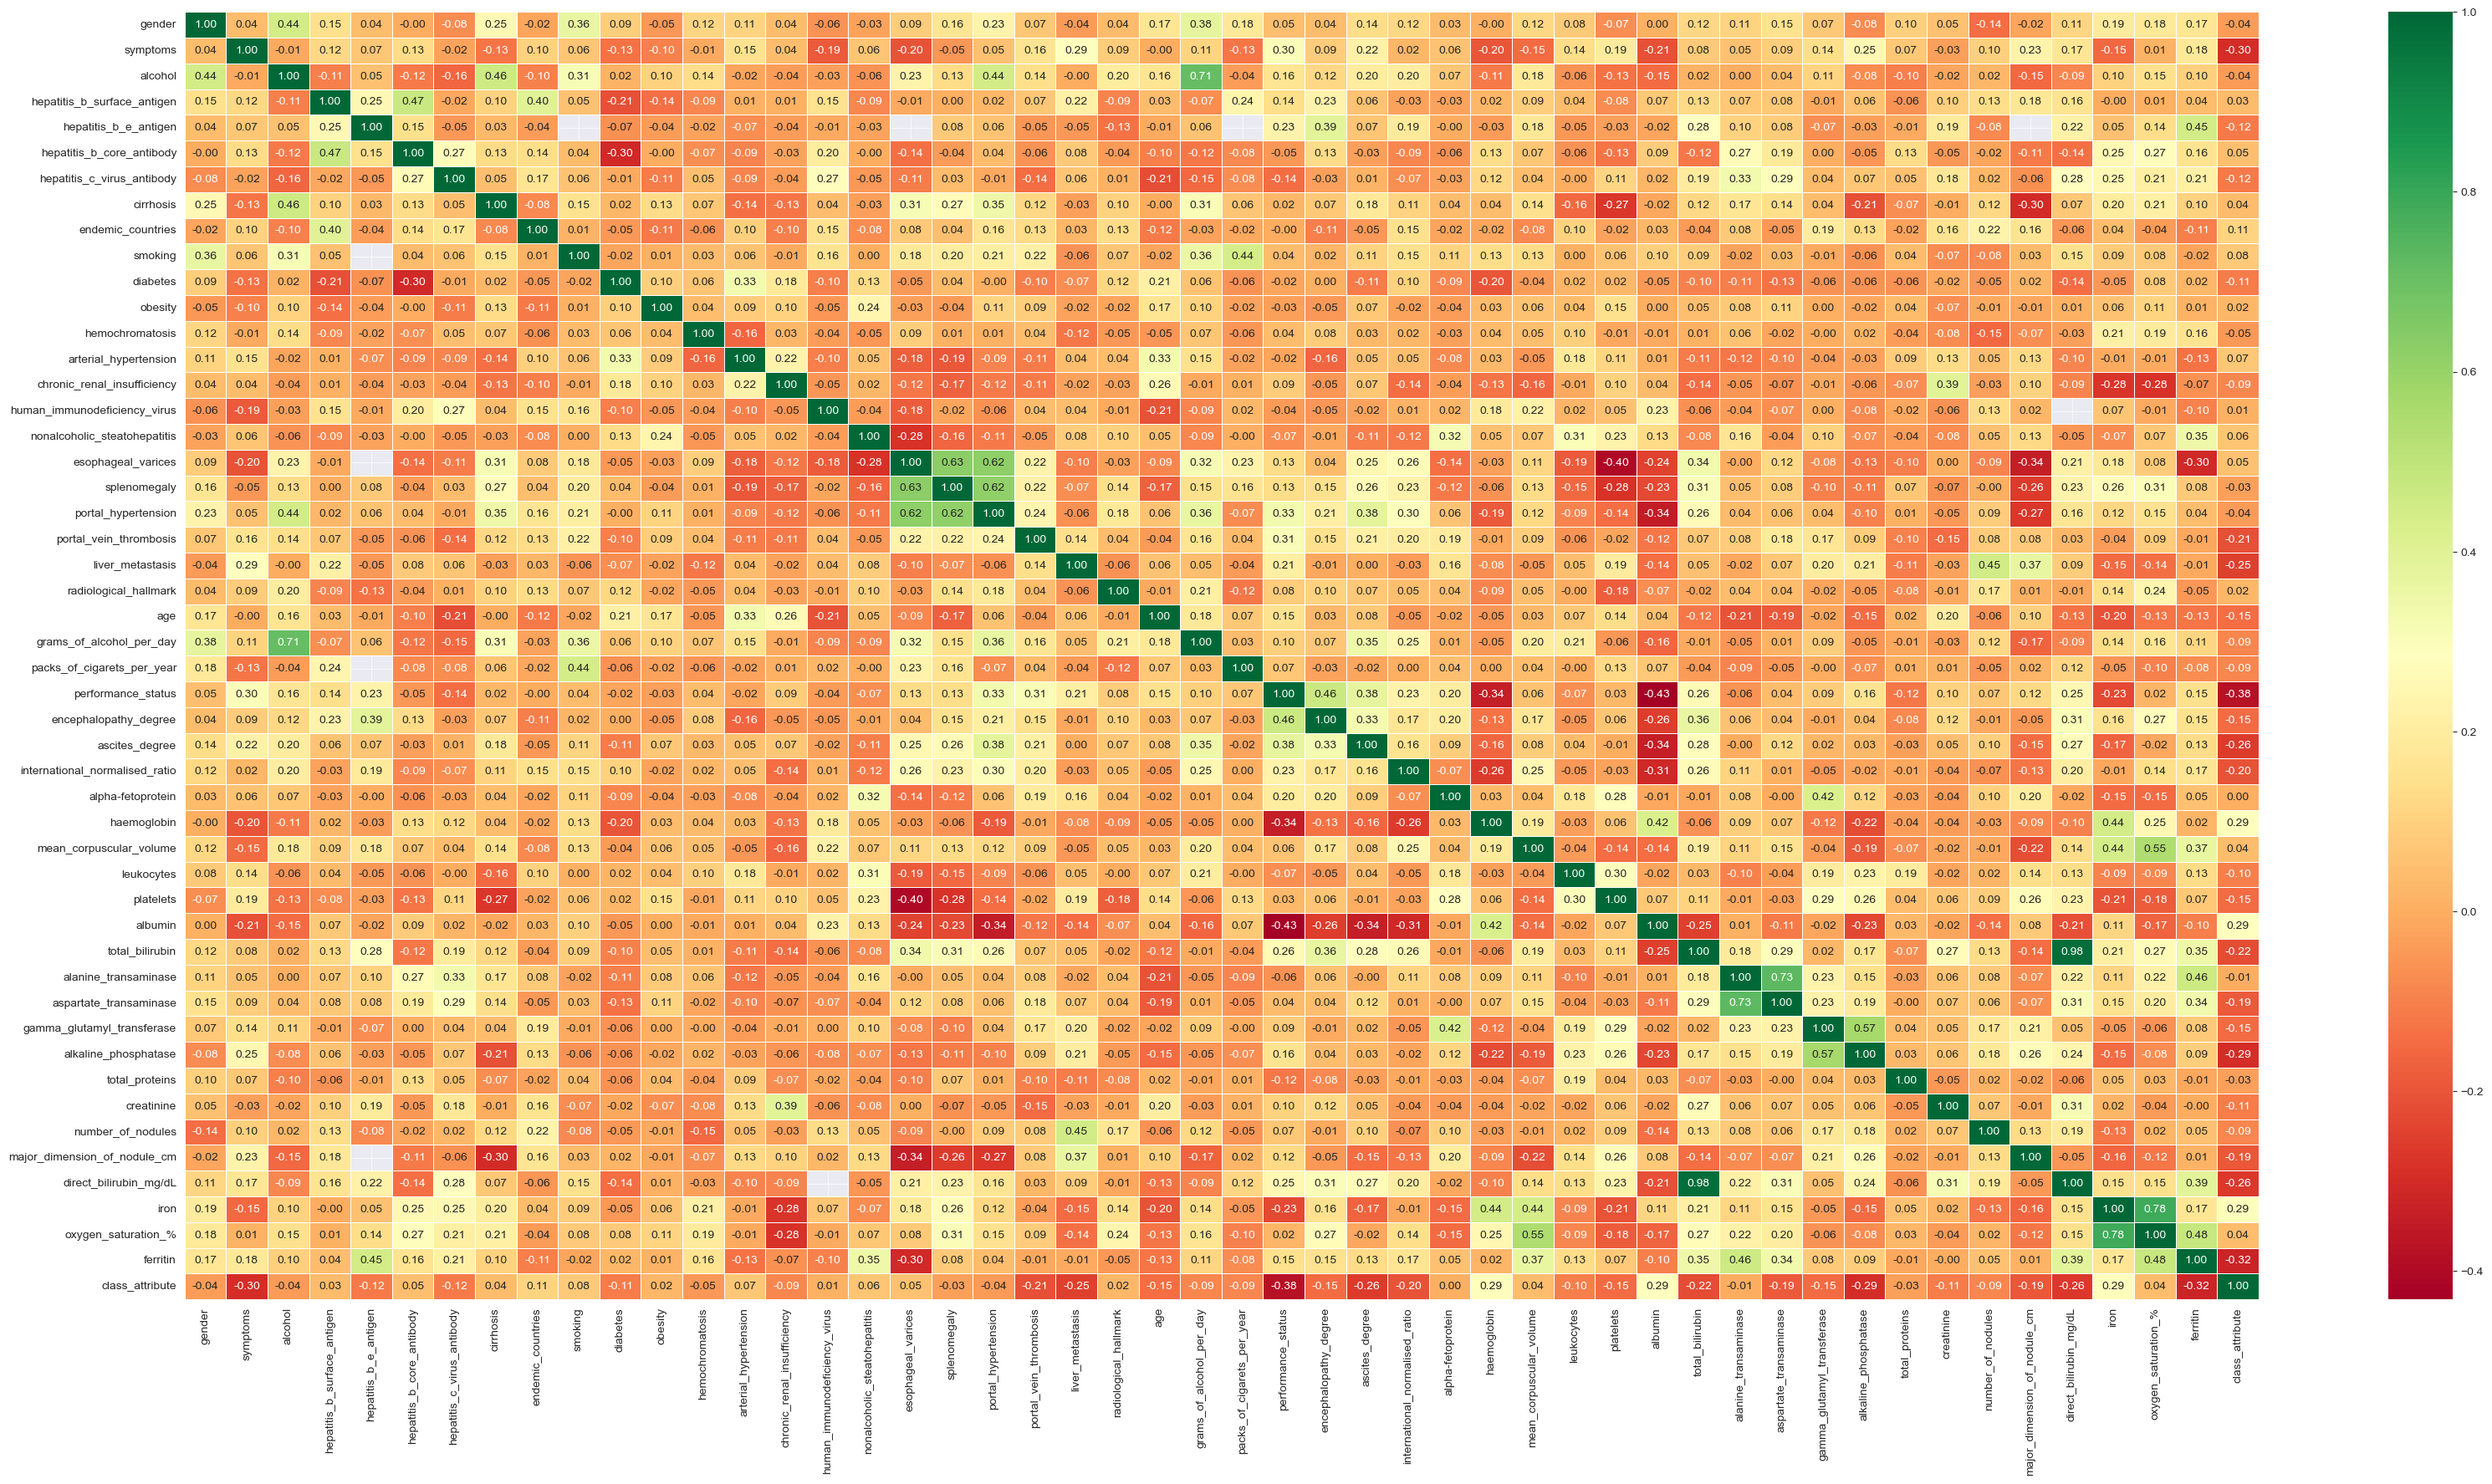

In [206]:
orr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

<Axes: >

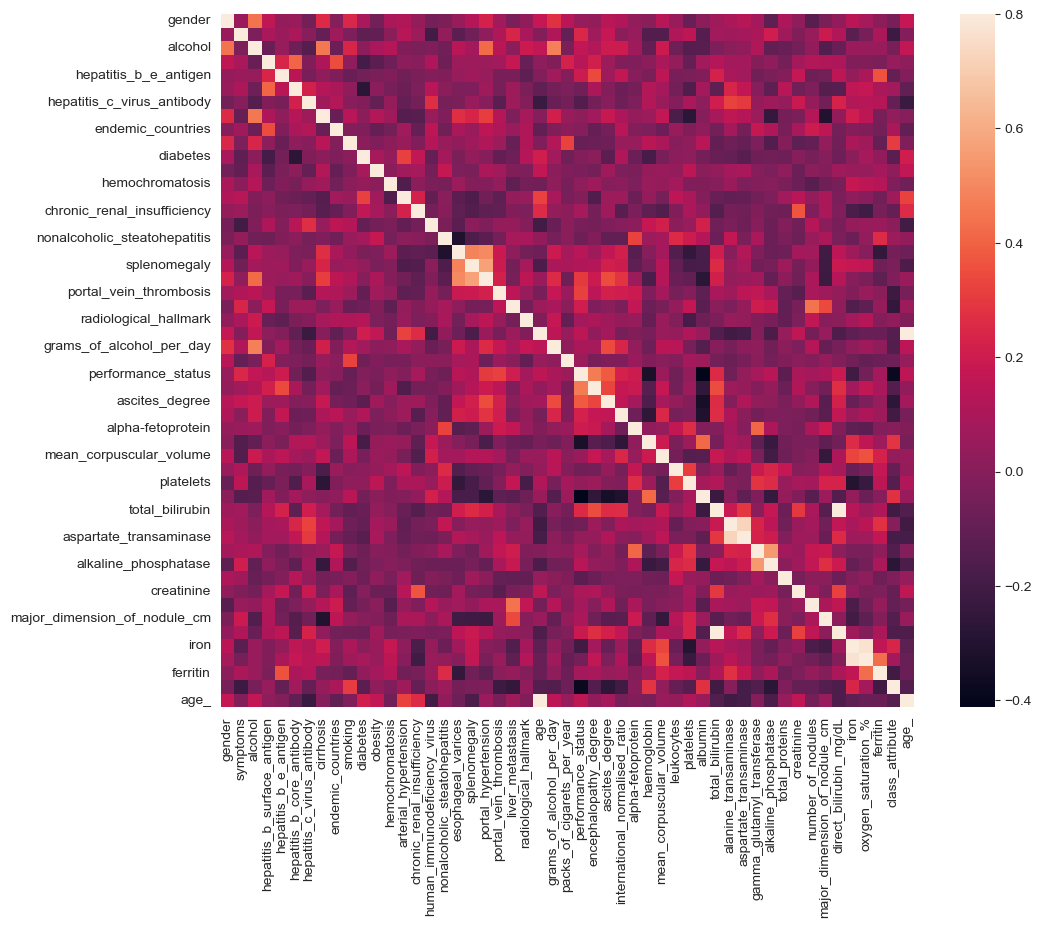

In [207]:
f, ax = plt.subplots(
    figsize=(12, 9)
)

sns.heatmap(
    data.corr(), 
    vmax=.8, 
    square=True
)

SPLITTING DATA

We have binarized ordinal values so we don't want to include its initial form to our X dataset. Also the age column values have been averaged.

In [208]:
to_drop_columns = [
    'age', 
    'encephalopathy_degree', 
    'ascites_degree', 
    'performance_status', 
    'number_of_nodules'
]

columns_set = set(columns)

_columns = list(columns_set.difference(to_drop_columns))

In [209]:
len(columns)

50

In [210]:
len(_columns)

45

In [215]:
X = data[_columns].values
y = data['class_attribute'].values

In [216]:
X_new = np.hstack((X, binarized_ordinal_matrix_data, age_, binarized_number_of_nodules))

In [217]:
X_new.shape

(165, 63)

STANDARIZATION - OPTIONAL

In [218]:
std_scaler = StandardScaler() #StandardScaler() # RobustScaler
X_new = std_scaler.fit_transform(X_new)

SPLITTING DATA INTO TRAIN AND TEST DATASETS

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    random_state=42,
    test_size=0.40
)

LOGISTIC REGRESSION

In [229]:
log_reg = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    C=0.4,
    multi_class='ovr',
    penalty='l2',
)

In [230]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.4, multi_class='ovr', random_state=42)

In [231]:
log_reg_predict = log_reg.predict(X_test)

In [232]:
log_reg.score(X_test, y_test)

0.9848484848484849

In [233]:
preds = log_reg.predict(X_test)

In [234]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, log_reg_predict))


Logistic Regression Accuracy: 98.48%
Logistic Regression AUC: 98.72%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.97      0.99        39

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



F1 SCORE AFTER 5-FOLD CROSS-VALIDATION

In [235]:
kfold = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

predicted = cross_val_predict(
    log_reg, 
    X_new, 
    y, 
    cv=kfold
)

scores = cross_val_score(
    log_reg, 
    X_new, 
    y, 
    cv=kfold,
    scoring='f1'
)

print('Cross-validated scores: {}\n'.format(scores))

print(classification_report(y, predicted))

print("LogisticRegression: F1 after 5-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    scores.mean() * 100,
    scores.std() * 2
))

Cross-validated scores: [1.         1.         1.         1.         0.97674419]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.99      1.00      1.00       102

    accuracy                           0.99       165
   macro avg       1.00      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165

LogisticRegression: F1 after 5-fold cross-validation: 99.53% (+/- 0.02%)


Support Vector Machines (SVM)

In [236]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
svm_predict = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predict)
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy * 100))


SVM Accuracy: 100.00%


Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predict = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predict)
print('Random Forest Accuracy: {:.2f}%'.format(rf_accuracy * 100))


Random Forest Accuracy: 100.00%


Gradient Boosting

In [238]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predict = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_predict)
print('Gradient Boosting Accuracy: {:.2f}%'.format(gb_accuracy * 100))


Gradient Boosting Accuracy: 100.00%


Decision Trees

In [239]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions
dt_predict = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predict)
print('Decision Tree Accuracy: {:.2f}%'.format(dt_accuracy * 100))


Decision Tree Accuracy: 100.00%
